# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


qURL = url + "&units=metric" + "&appid=" + weather_api_key
qURL

'http://api.openweathermap.org/data/2.5/weather?&units=metric&appid=a7eb25ff99dc8dac9afd8287a298d392'

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = qURL + "&q=" + city
    response = requests.get(city_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | soloma
Processing Record 4 of Set 1 | dingle
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | kroya
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | coracora
Processing Record 10 of Set 1 | san remo
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | labuhan
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | gillette
Processing Record 18 of Set 1 | moose factory
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | ahuimanu
Processing Record 22 of Set 1 | kawana waters
City not

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,1.06,80,100,16.09,RU,1670283910
1,port alfred,-33.5906,26.8910,13.99,95,3,0.89,ZA,1670283989
2,soloma,15.7167,-91.4500,15.44,98,24,1.93,GT,1670283990
3,dingle,10.9995,122.6711,25.80,84,39,4.27,PH,1670283991
4,poum,-20.2333,164.0167,27.49,79,97,6.13,NC,1670283992


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,1.06,80,100,16.09,RU,1670283910
1,port alfred,-33.5906,26.8910,13.99,95,3,0.89,ZA,1670283989
2,soloma,15.7167,-91.4500,15.44,98,24,1.93,GT,1670283990
3,dingle,10.9995,122.6711,25.80,84,39,4.27,PH,1670283991
4,poum,-20.2333,164.0167,27.49,79,97,6.13,NC,1670283992


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

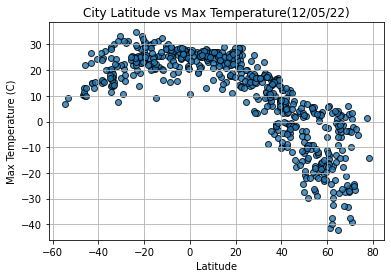

In [9]:
# Build scatter plot for latitude vs. temperature


                                             
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title("City Latitude vs Max Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

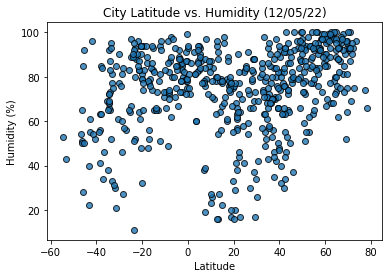

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

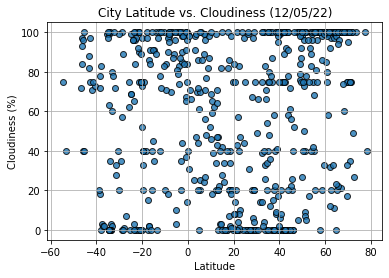

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

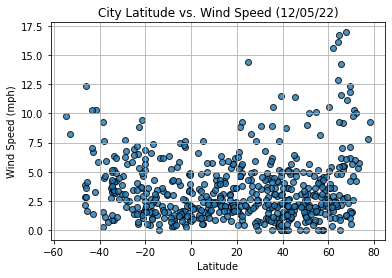

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,1.06,80,100,16.09,RU,1670283910
2,soloma,15.7167,-91.4500,15.44,98,24,1.93,GT,1670283990
3,dingle,10.9995,122.6711,25.80,84,39,4.27,PH,1670283991
6,albany,42.6001,-73.9662,5.23,55,100,0.89,US,1670283865
9,san remo,43.8182,7.7612,11.29,65,58,1.79,IT,1670283994


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,13.99,95,3,0.89,ZA,1670283989
4,poum,-20.2333,164.0167,27.49,79,97,6.13,NC,1670283992
5,kroya,-7.6331,109.2461,25.07,87,100,0.74,ID,1670283992
7,mar del plata,-38.0023,-57.5575,24.90,85,0,7.60,AR,1670283888
8,coracora,-15.0333,-73.7833,9.16,65,91,2.31,PE,1670283993


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6969129125776821


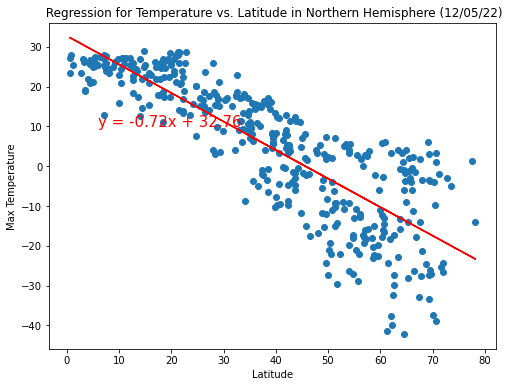

In [16]:
# Linear regression on Northern Hemisphere
x_AxisLinRegNorth = northern_hemi_df["Lat"]
y_AxisLinRegNorth = northern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_AxisLinRegNorth, y_AxisLinRegNorth)
regress_values = x_AxisLinRegNorth * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting
plt.scatter(x_AxisLinRegNorth,y_AxisLinRegNorth)
plt.plot(x_AxisLinRegNorth,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="r")
plt.title(' Regression for Temperature vs. Latitude in Northern Hemisphere (%s)' % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#r squared value
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()


The r-squared is: 0.23297575364719586


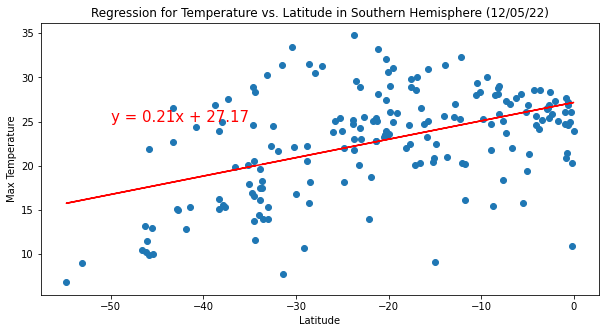

In [17]:
# Linear regression on Southern Hemisphere
x_AxisLinRegSouth = southern_hemi_df["Lat"]
y_AxisLinRegSouth = southern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_AxisLinRegSouth, y_AxisLinRegSouth)
regress_values = x_AxisLinRegSouth* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_AxisLinRegSouth,y_AxisLinRegSouth)
plt.plot(x_AxisLinRegSouth,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="r")
plt.title('Regression for Temperature vs. Latitude in Southern Hemisphere (%s)' % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** Pretty much shows a relationship between the two hemispheres where the further you get from the equator, the more the tempature drops. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12573027344589338


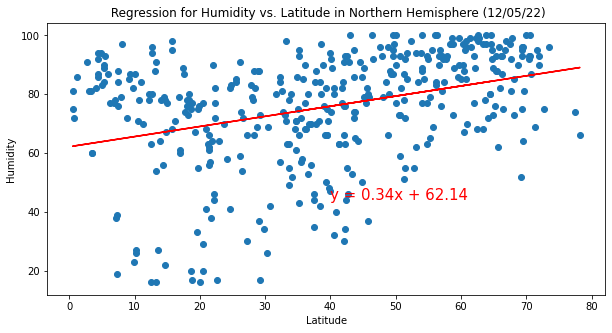

In [18]:
# Northern Hemisphere
x_AxisLinRegNorthHum = northern_hemi_df["Lat"]
y_AxisLinRegNorthHum = northern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_AxisLinRegNorthHum, y_AxisLinRegNorthHum)
regress_values = x_AxisLinRegNorthHum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_AxisLinRegNorthHum,y_AxisLinRegNorthHum)
plt.plot(x_AxisLinRegNorthHum,regress_values,"r-")
plt.annotate(line_eq,(40,44),fontsize=15,color="r")
plt.title(' Regression for Humidity vs. Latitude in Northern Hemisphere (%s)' % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()


The r-squared is: 0.197
y = 0.59 x + 85.65


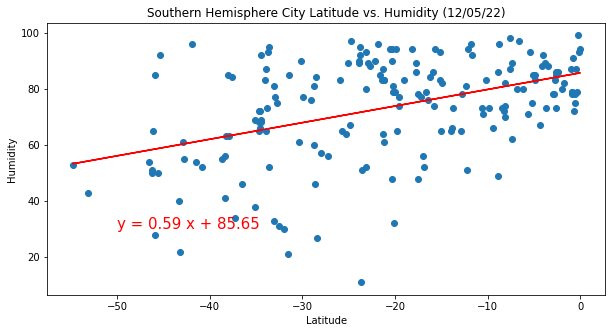

In [19]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_humidity)
plt.plot(southern_lat, regress_values, "r-")
plt.annotate(line_eq,(-50,30), fontsize=15, color='r')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Show plot
plt.show()


**Discussion about the linear relationship:** the two graphs show almost no correlation between latitude and and humidity, suggesting that the biome and enviromental factors are more important when trying to see what correlations humidity has with geography. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.106
y = 0.63 x + 33.25


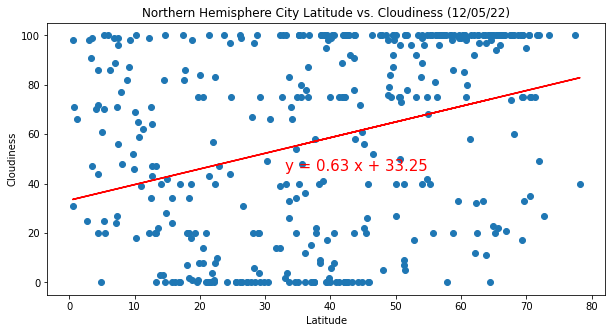

In [20]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_cloudiness)
plt.plot(northern_lat, regress_values, "r-")
plt.annotate(line_eq,(33,45), fontsize=15, color='r')

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()

The r-squared is: 0.046
y = 0.59 x + 75.01


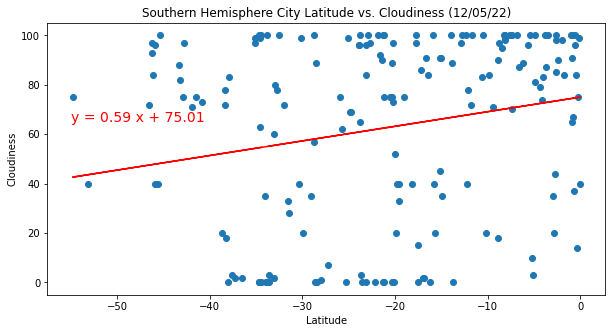

In [21]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_cloudiness)
plt.plot(southern_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,65), fontsize=14, color="red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** Shows 0 correlation. Clouds exist, and they exist everywhere. Obviously some places are going to be more cloudy than others, but as stated in my previous analysis, youre probably going to find more correlation with humidity by looking at the biome and enviromental factors. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.044
y = 0.03 x + 2.3


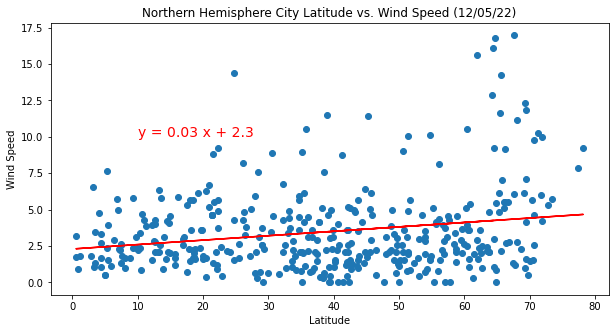

In [26]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind_speed)
regress_values = northern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_lat, northern_wind_speed)
plt.plot(northern_lat, regress_values, "r-")
plt.annotate(line_eq,(10,10), fontsize=14, color='r')

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)
plt.show()


The r-squared is: 0.106
y = -0.06 x + 2.25


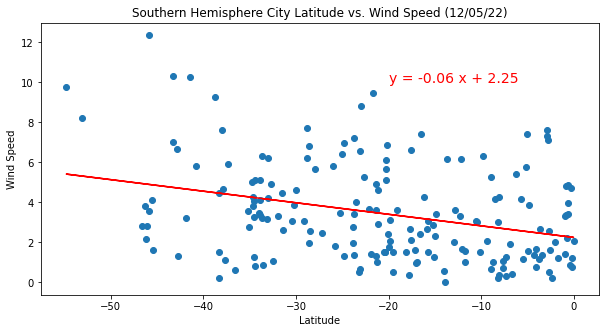

In [25]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind_speed)
regress_values = southern_lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_lat, southern_wind_speed)
plt.plot(southern_lat, regress_values, 'r-')
plt.annotate(line_eq,(-20,10), fontsize=14, color='r')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

**Discussion about the linear relationship:** once again it would appear that there is no correlation between wind speed and latitude. Out of all the linear relationships, it seems like the only significant data we can rely on would be tempatures relationship with the equator. 